# Explorations in Deep Learning

In this notebook, we're going to dive into the ABC of deep learning. We will utilize the Fashion MNIST dataset, which comprises 70,000 images of fashion artifacts.

To tackle this challenge, we will implement a Multi-Layer Perceptron (MLP) that includes several hidden layers. Additionally, we will craft a convolutional neural network (CNN), which is particularly designed for handling image data.

Finally, we'll investigate how to mimic a perceptual experimental task. This will involve evaluating the resilience of our model against noise introduced into the images, to see how well it can maintain accuracy under perturbations of the input data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm


np.set_printoptions(suppress=True)

import sklearn.metrics as metrics

import tensorflow as tf
#from tensorflow import keras
import keras

import ipywidgets

/home/krupkaa/anaconda3/envs/cognitive/lib/python3.12/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
2025-04-14 14:50:28.401361: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-14 14:50:28.412915: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-14 14:50:28.420180: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-14 14:50:28.433648: E external

## Loading the data

Fashion MNIST is already split into training / test sets, so we don't need to use `train_test_split`. It is also already divided between input data (pixels) and output targets (digit classes).

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

The images are in a two dimensional format (28x28 matrices). However, the neural network requires one dimensional input vectors, thus the first step is to flatten the matrices with the function `reshape`, obtaining a vector of 784 elements.

Moreover, the images are saved in a conventional format, where each pixel can assume values between 0 and 255. Hence, the second step is to normalize such values to a 0-1 interval, simply by dividing by 255.

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
# Comvert to float32 and standardize
train_images = train_images.astype(np.float32).reshape(60000, 28 * 28)
test_images = test_images.astype(np.float32).reshape(10000, 28 * 28)

train_images = train_images / 255
test_images = test_images / 255


Visualizing the first 36 test images:

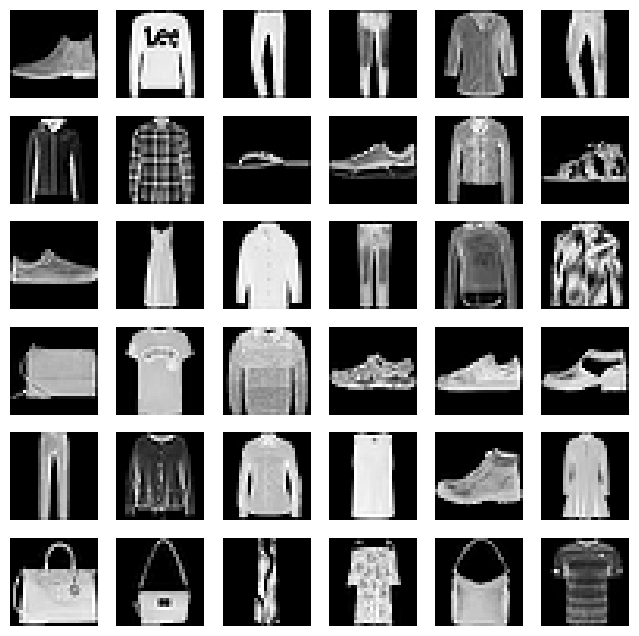

In [5]:
fig, axarr = plt.subplots(6, 6, figsize=(8, 8))
for i, ax in enumerate(axarr.flat):
    ax.imshow(test_images[i].reshape(28, 28), cmap="gray")
    ax.axis('off')

## Feedforward Network Architecture

First, we will use the keras high-level API. Then, we will re-do the task with the tensorflow low-level API.

### Model Setup

In [6]:
# Basic feedforward structure
### Your code here
model = keras.Sequential([
    keras.Input(shape=(train_images.shape[-1],)),
    keras.layers.Dense(512, activation="silu"),
    #keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.L2(1e-3)),
    #keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.L2(1e-3)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="silu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="silu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])

# Define the Optimizer 

optimizer = keras.optimizers.Adam(learning_rate=5e-4)



## Connect the model to the optimizer, and give it the loss.
model.compile(optimizer=optimizer, 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
)


2025-04-14 14:50:32.100775: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [7]:
-np.log(0.00001)

np.float64(11.512925464970229)

In [8]:
x = keras.random.normal((2, 784))

In [9]:
# model # Doesnt do much
model(x)


<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0.06666203, 0.06173041, 0.0672456 , 0.06926512, 0.18319389,
        0.1276099 , 0.0712171 , 0.08707812, 0.12504399, 0.14095388],
       [0.10157397, 0.04348299, 0.07303315, 0.11060433, 0.21389209,
        0.05486707, 0.08853751, 0.13994423, 0.04794576, 0.12611897]],
      dtype=float32)>

In [10]:
# Fitting the model
### Your code here
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,386 (1.85 MB)

 Trainable params: 485,386 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Fitting the model
h = model.fit(train_images, train_labels, batch_size=64, epochs=30, validation_split=0.1)

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7165 - loss: 0.8093 - val_accuracy: 0.8465 - val_loss: 0.4155
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8489 - loss: 0.4208 - val_accuracy: 0.8645 - val_loss: 0.3623
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8641 - loss: 0.3682 - val_accuracy: 0.8740 - val_loss: 0.3473
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8751 - loss: 0.3413 - val_accuracy: 0.8803 - val_loss: 0.3253
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8815 - loss: 0.3211 - val_accuracy: 0.8798 - val_loss: 0.3177
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8862 - loss: 0.3090 - val_accuracy: 0.8850 - val_loss: 0.3203
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8931 - loss: 0.2880 - val_accuracy: 0.8885 - val_loss: 0.3017
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8924 - loss: 0.2844 - val_accuracy: 0.

### Visualize Loss Trajectory

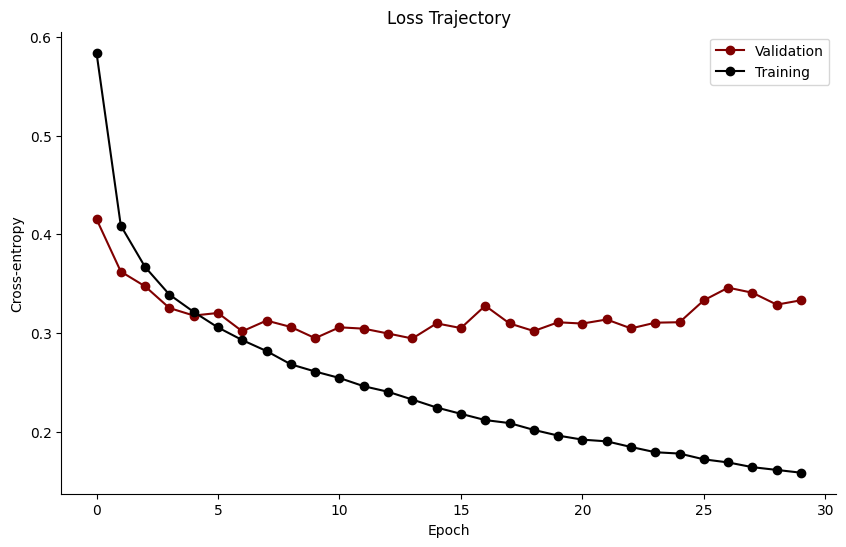

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(range(30), h.history['val_loss'], 'o-', color='maroon', label='Validation')
ax.plot(range(30), h.history['loss'], 'o-', color='black', label='Training')
ax.set_xlabel('Epoch')
ax.set_ylabel('Cross-entropy')
ax.legend()
ax.set_title('Loss Trajectory')
sns.despine(ax=ax)

In [13]:
# Evaluate model on test data

## Keras models have a .evaluate function that looks at the training set, validation set, and test set
# Shouldnt look at the testset before evaluating the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8933 - loss: 0.3699


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


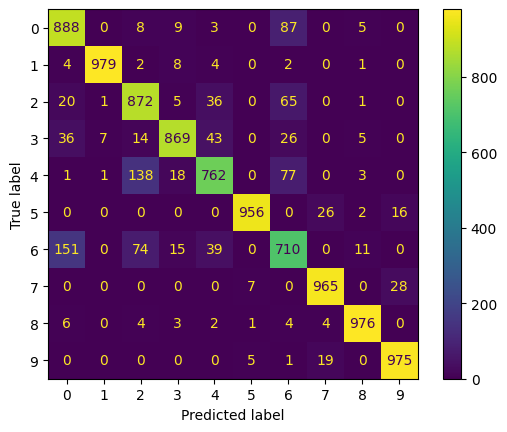

In [14]:
# More detailed evaluations
preds = model.predict(test_images)
metrics.ConfusionMatrixDisplay.from_predictions(test_labels, preds.argmax(axis=1))

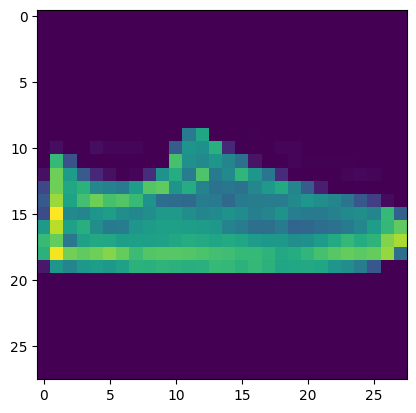

In [15]:
plt.imshow(test_images[12].reshape((28,28)))

## Custom Training Loop

### Model and Hyperparameters

In [41]:
# Create a TF data set
dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
dataset = dataset.shuffle(buffer_size=train_images.shape[0])
dataset = dataset.batch(32)

# Create loss object
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Create optimizer
optimizer = tf.keras.optimizers.Adam(1e-4)

# Create basic feedforward model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [42]:
x = tf.Variable(9.)

with tf.device("CPU:1"):
    with tf.GradientTape(persistent=True) as tape:
        y = x**2

### Custom Training Step

In [43]:
@tf.function
def update_step(batch_images, batch_labels, model, optimizer, loss_fn):
    with tf.GradientTape() as tape:


        ### Forward pass
        
        batch_preds = model(batch_images)
        

        ### Compute loss

        # Does order of elements matter for cross entropy?  - No

        # Compute the loss as a function of the predictions vs ground truth
        loss = loss_fn(batch_labels, batch_preds)

    ### Compute gradients w.r.t batch loss
    grads = tape.gradient(loss, model.trainable_variables)

    ### Update trainable parameters
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    return loss

### Custom Epoch

In [44]:
def train_epoch(dataset, model, optimizer, loss_fn, pbar, add_noise=True):
    # Define a list of collective looses
    losses = []

    # Loop over the dataset 
    for (batch_img, batch_labels) in dataset:
        # Try adding some noise to the test data and see if it improves accuracy
        if add_noise:
            a = np.random.uniform(0, 0.5)
            z = np.random.normal(size = batch_img.shape)
            batch_img += a*z


        loss = update_step(batch_img, batch_labels, model, optimizer, loss_fn)
        losses.append(loss.numpy())
        pbar.set_postfix_str(f'Loss: {loss.numpy():.3f}', refresh=False)
        pbar.update(1)
    return losses

### Custom Training

In [45]:
len(dataset)

1875

In [46]:
epochs = 10
for ep in range(1, epochs+1):
    with tqdm(total=len(dataset), desc=f"Training epoch {ep}", mininterval=0.1) as pbar:
        l = train_epoch(dataset, model, optimizer, loss_fn, pbar)

Training epoch 1:   0%|          | 0/1875 [00:00<?, ?it/s]

Training epoch 2:   0%|          | 0/1875 [00:00<?, ?it/s]

Training epoch 3:   0%|          | 0/1875 [00:00<?, ?it/s]

Training epoch 4:   0%|          | 0/1875 [00:00<?, ?it/s]

Training epoch 5:   0%|          | 0/1875 [00:00<?, ?it/s]

Training epoch 6:   0%|          | 0/1875 [00:00<?, ?it/s]

Training epoch 7:   0%|          | 0/1875 [00:00<?, ?it/s]

Training epoch 8:   0%|          | 0/1875 [00:00<?, ?it/s]

Training epoch 9:   0%|          | 0/1875 [00:00<?, ?it/s]

Training epoch 10:   0%|          | 0/1875 [00:00<?, ?it/s]

In [47]:
# More detailed evaluations
### Your code here
preds = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


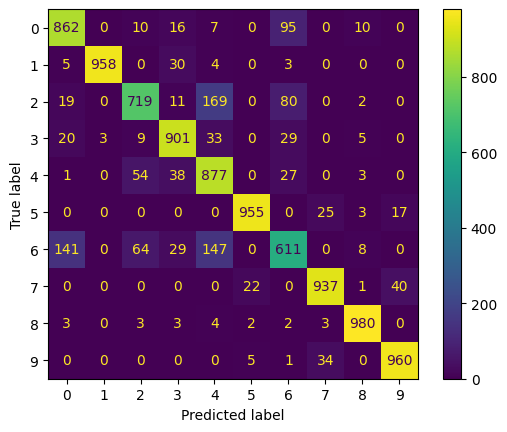

In [48]:
metrics.ConfusionMatrixDisplay.from_predictions(test_labels, preds.argmax(axis=1))

In [49]:
np.sum(preds.argmax(axis=1) == test_labels) / test_labels.shape[0]

np.float64(0.876)

## Explorations in Robustness

We will now explore an important question regarding the real-world pitfalls of model deployment: What is the impact of additive noise on recognition accuracy? We will systematically investigate this effect by creating a psychometric function where accuracy is plotted against stimulus visibility / noise level.

In [50]:
min_noise_level = 0
max_noise_level = 0.5
num_noise_levels = 50
noise_levels = np.linspace(min_noise_level, max_noise_level, num_noise_levels)

Let's investigate the impact of noise levels on image quality first.

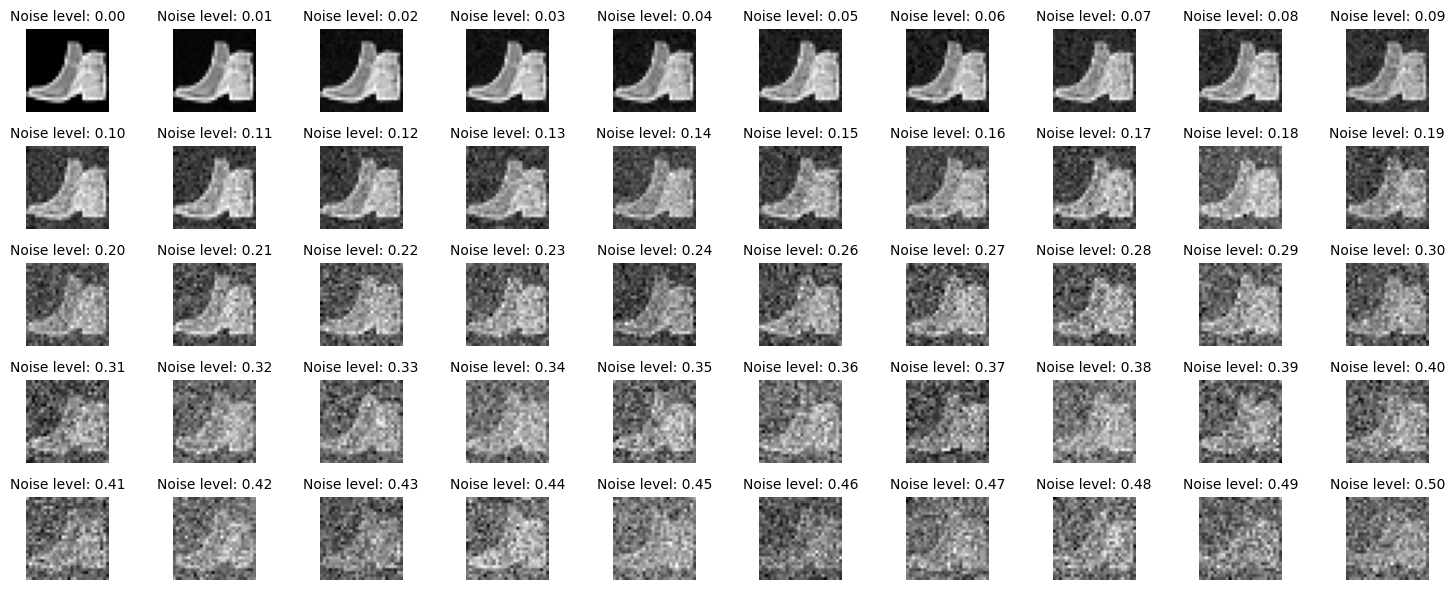

In [51]:
f, axarr = plt.subplots(5, 10, figsize=(15, 6))
random_test_image = train_images[np.random.randint(0, train_images.shape[0])]
for noise_level, ax in zip(noise_levels, axarr.flat):
    noisy_images = random_test_image + noise_level * np.random.normal(size=random_test_image.shape)
    ax.imshow(noisy_images.reshape(28, 28), cmap='gray')
    ax.set_title(f'Noise level: {noise_level:.2f}', fontsize=10)
    ax.axis('off')
f.tight_layout()

We will now iteratively add Gaussian noise with different amplitude to the test set and compute total accuracy.

In [52]:
accuracies = []
for noise_level in noise_levels:
    corrupted_images = test_images + noise_level * np.random.normal(size=test_images.shape)
    preds = model.predict(corrupted_images)
    accuracy = (preds.argmax(1) == test_labels).sum() / test_labels.shape[0]
    accuracies.append(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━

What do you observe?

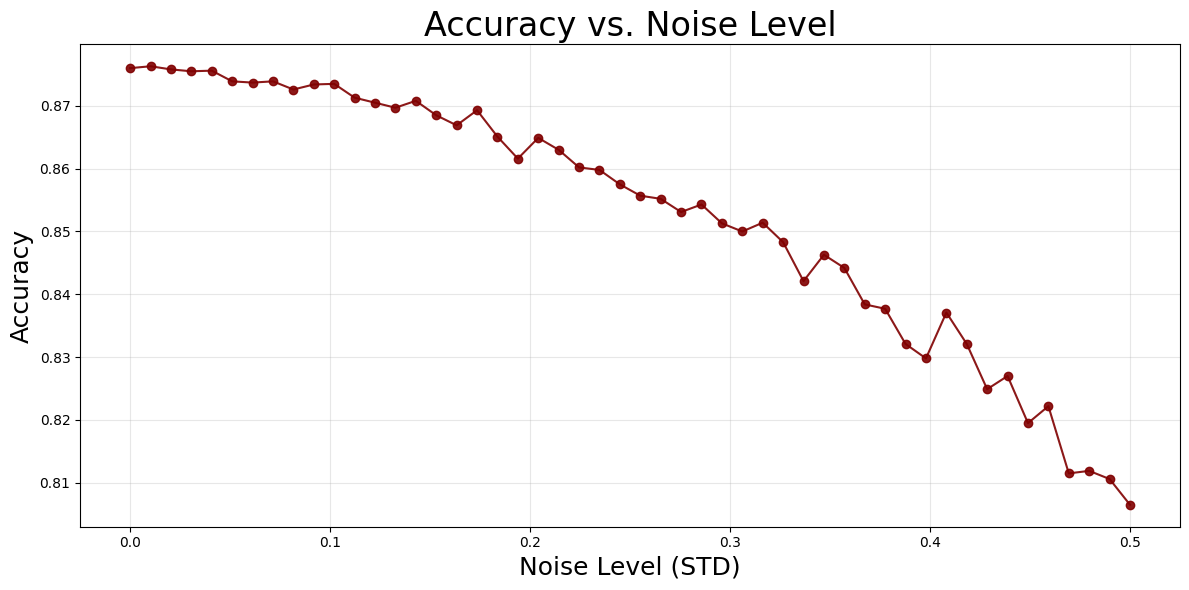

In [53]:
f, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(noise_levels, accuracies, '-o', color='maroon', alpha=0.9)
ax.set_xlabel('Noise Level (STD)', fontsize=18)
ax.set_ylabel('Accuracy', fontsize=18)
ax.set_title('Accuracy vs. Noise Level', fontsize=24)
ax.grid(alpha=0.3)
f.tight_layout()

## Task: Data Augmentation

Is it possible to improve recognition accuracy on the test set by injecting noise into the training data? 

Your task is to train the same neural network on augmented (noisy data) and plot its psychometric function relative to the vanilla model. There are many ways to do this!

In [ ]:
### Your code here

## Task: Coging Convolutional

Your code here.